In [93]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from net.network import NetA, ResNet

In [94]:
def load_obj():
    with open('./losses.pkl', 'rb') as f:
        data = pickle.load(f)
    return data

data = load_obj()
for k, v in data.items():
    if data[k]['MODEL'] == NetA:
        data[k]['MODEL'] = 'NetA'
    elif data[k]['MODEL'] == ResNet:
        data[k]['MODEL'] = 'ResNet'

df = pd.DataFrame.from_dict(data, orient='index')
df

,losses,EQUATION,MODEL,KERNEL_SIZE,BLOCKS,EPSILON,LOSS_TYPE,FILTERS,MAEa,MSEa,MIEa,MAEu,MSEu,MIEu
Standard\500N31\20200704T115102,"{'loss_a': [0.0014008926153182984, 0.001366454...",Standard,ResNet,5,0,0.1,MAE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Standard\500N31\20200704T120619,"{'loss_a': [0.0010492830276489257, 0.001015375...",Standard,ResNet,5,0,0.1,MAE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Standard\10000N31\20200704T121209,"{'loss_a': [5.839865803718567e-05, 5.647708177...",Standard,ResNet,5,0,0.1,MAE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Standard\10000N31\20200704T124332,"{'loss_a': [8.24008125, 7.69129140625, 0.36565...",Standard,ResNet,5,0,0.1,MSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Burgers\10000N31\20200704T151344,"{'loss_a': [4.11263984375, 3.829959375, 0.4715...",Burgers,ResNet,5,0,0.5,MSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
training\Helmholtz\500N31\ResNet_MSE_epochs50000_blocks0_nbfuncs1,"{'loss_a': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Helmholtz,ResNet,5,0,0.0,MSE,32.0,0.000036,0.001679,0.000806,0.000041,0.000526,0.000777
training\Helmholtz\5000N31\NetA_MSE_epochs100000_blocks2_nbfuncs1,"{'loss_a': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Helmholtz,NetA,5,2,0.0,MSE,32.0,0.000027,0.001234,0.000789,0.000067,0.000758,0.000979
training\Burgers\10000N31\ResNet_MSE_epochs1_blocks16_20200801T151052,"{'loss_a': [0.0], 'loss_u': [5816489.5744], 'l...",Burgers,ResNet,5,16,0.5,MSE,32.0,4.912284,546.372671,338.714869,7.153151,209.397766,232.191147
training\Helmholtz\100N63\ResNet_MSE_epochs5_blocks2_20200801T161840,"{'loss_a': [0.0, 0.0, 0.0, 0.0, 0.0], 'loss_u'...",Helmholtz,ResNet,5,2,0.0,MSE,32.0,0.599987,41.062629,16.707392,1.010460,12.479420,20.703227


In [95]:
df['EQUATION'].unique()

array(['Standard', 'Burgers', 'Helmholtz'], dtype=object)

In [106]:
he = df[df['Equation'.upper()] == 'Helmholtz']
he['Model'] = he.index

C:\Users\Alien\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [107]:
he

,losses,EQUATION,MODEL,KERNEL_SIZE,BLOCKS,EPSILON,LOSS_TYPE,FILTERS,MAEa,MSEa,MIEa,MAEu,MSEu,MIEu,Model
Helmholtz\50N63\20200706T115526,"{'loss_a': [148554.15, 142448.58, 21783.16, 15...",Helmholtz,ResNet,5,0,0.1,MSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Helmholtz\50N63\20200706T115526
Helmholtz\50N63\20200706T115634,"{'loss_a': [205384.0, 196571.16, 41155.9325, 2...",Helmholtz,ResNet,5,0,0.1,MSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Helmholtz\50N63\20200706T115634
Helmholtz\50N63\20200706T120355,"{'loss_a': [214138.82, 198694.62, 63567.815, 4...",Helmholtz,NetA,5,2,0.1,MSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Helmholtz\50N63\20200706T120355
Helmholtz\500N63\20200706T131600,"{'loss_a': [73985.424, 69449.904, 30671.744, 1...",Helmholtz,NetA,5,2,0.1,MSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Helmholtz\500N63\20200706T131600
training\Helmholtz\500N63\20200706T132634,"{'loss_a': [223537.888], 'loss_u': [78597.544]...",Helmholtz,NetA,5,2,0.1,MSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,training\Helmholtz\500N63\20200706T132634
training\Helmholtz\500N63\20200706T133503,"{'loss_a': [135917.52], 'loss_u': [93228.16], ...",Helmholtz,NetA,5,2,0.1,MSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,training\Helmholtz\500N63\20200706T133503
training\Helmholtz\500N63\20200706T144256,"{'loss_a': [325869.952, 302075.936, 81163.936,...",Helmholtz,NetA,5,2,0.1,MSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,training\Helmholtz\500N63\20200706T144256
training\Helmholtz\500N63\20200706T144501,"{'loss_a': [98709.56, 92274.208, 32568.536, 20...",Helmholtz,NetA,5,2,0.1,MSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,training\Helmholtz\500N63\20200706T144501
training\Helmholtz\1000N63\20200706T212157,"{'loss_a': [40.6003984375, 37.7735390625, 28.0...",Helmholtz,NetA,5,2,0.0,MSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,training\Helmholtz\1000N63\20200706T212157
training\Helmholtz\50N63\20200706T215507,"{'loss_a': [24.02490234375, 23.66933349609375,...",Helmholtz,ResNet,5,0,0.0,MSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,training\Helmholtz\50N63\20200706T215507


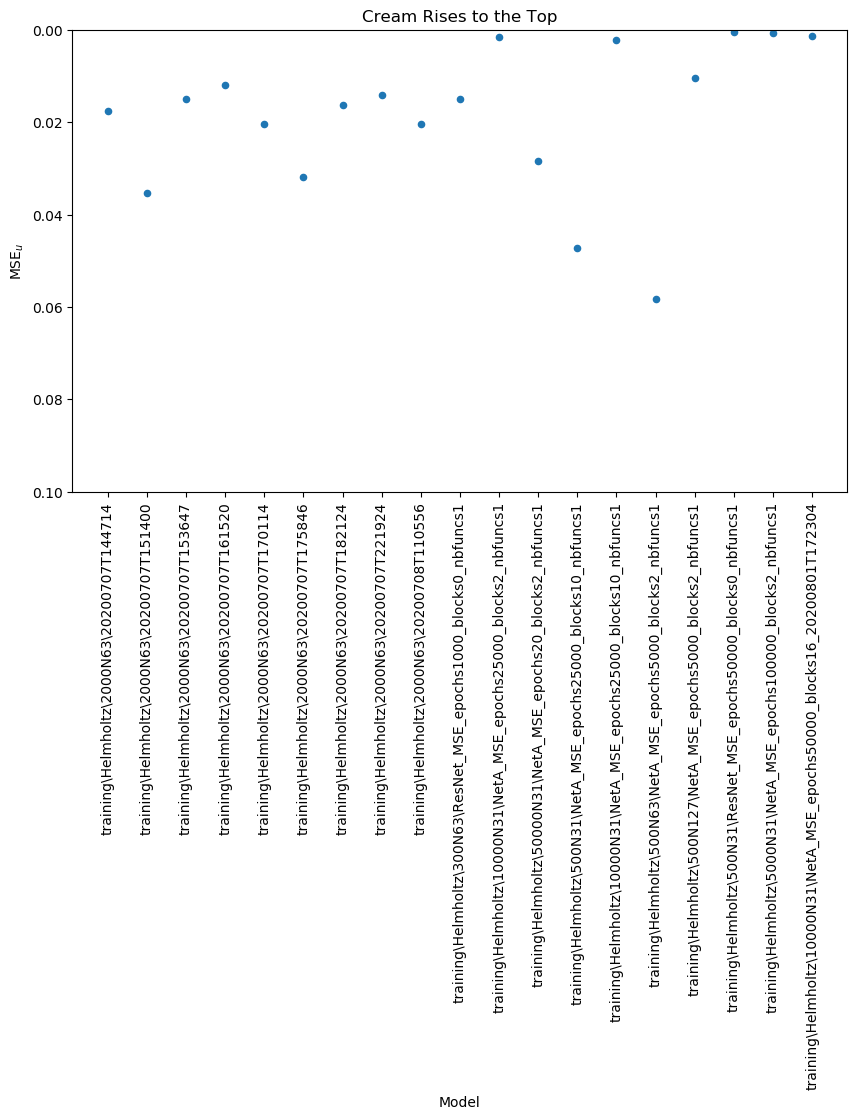

In [114]:
lim = .1
he = he[he['MSEu'] <= lim]
he.plot(kind='scatter', x='Model', y='MSEu', figsize=(10,6))
plt.xticks(rotation=90)
plt.ylim(lim, 0)
plt.ylabel('MSE$_u$')
plt.title('Cream Rises to the Top')
plt.show()

In [115]:
samp = he.iloc[-2]

In [116]:
samp

losses         {'loss_a': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
EQUATION                                               Helmholtz
MODEL                                                       NetA
KERNEL_SIZE                                                    5
BLOCKS                                                         2
EPSILON                                                        0
LOSS_TYPE                                                    MSE
FILTERS                                                       32
MAEa                                                     2.7e-05
MSEa                                                    0.001234
MIEa                                                    0.000789
MAEu                                                     6.7e-05
MSEu                                                    0.000758
MIEu                                                    0.000979
Model          training\Helmholtz\5000N31\NetA_MSE_epochs1000...
Name: training\Helmholtz\

C:\Users\Alien\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


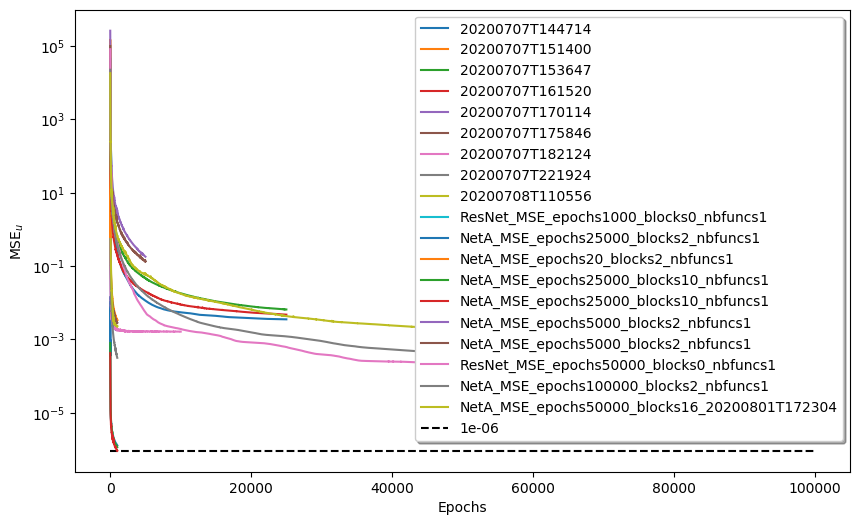

In [117]:
labels = {
    'loss_u': 'MSE$_u$',
}
vals = []
plt.figure(figsize=(10,6))
for dpoint in range(-len(he), 0):
    plt.semilogy(list(range(len(he.iloc[dpoint]['losses']['loss_u']))), he.iloc[dpoint]['losses']['loss_u'], label=he.iloc[dpoint]['Model'].split('\\')[-1])                                                                                                                        
    vals.append(min(he.iloc[dpoint]['losses']['loss_u']))
plt.hlines(min(vals), 0, 100000, label=np.round(min(vals),6), linestyle='dashed')
plt.legend(shadow=True)
plt.xlabel('Epochs')
plt.ylabel('MSE$_u$')
plt.show()